# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) (optional) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [14]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
import pandas as pd

def f(x, m, q):
    return m*x+q

In [31]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

# place your loading code here
df = pd.read_csv(filename)
print
data = df.to_numpy().transpose()
indeces = ["km", "year", "powerPS", "avgPrice"]

df.plot(x=["km, year, powerPS"], y=["avgPrice"])

print(df)
print(data)

KeyError: "None of [Index(['km, year, powerPS'], dtype='object')] are in the [columns]"

Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




[LinregressResult(slope=-0.05425151330972561, intercept=16692.345302519734, rvalue=-0.2572867429988496, pvalue=4.689714410723692e-21, stderr=0.005662227565052588, intercept_stderr=512.1908433023633), LinregressResult(slope=1509.0938253352235, intercept=-3018309.484956963, rvalue=0.6767043169095447, pvalue=2.0722311599106967e-174, stderr=45.625811824073175, intercept_stderr=91628.09494333208), LinregressResult(slope=90.33080718820236, intercept=-1303.9126989880006, rvalue=0.708550031526397, pvalue=2.6708763984319558e-198, stderr=2.499921328930259, intercept_stderr=413.9119040279445)]


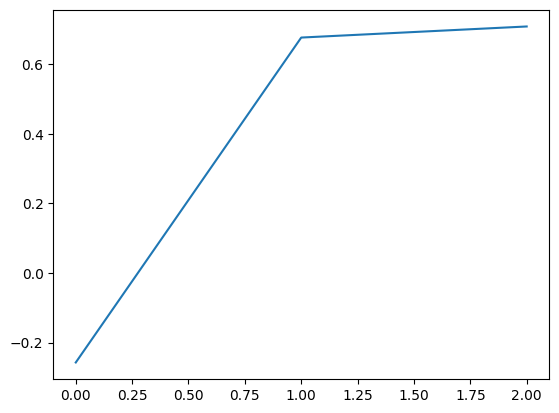

In [16]:
# linear regression with linregress (estimate price from year)
from scipy.stats import linregress
y = data[-1]

results = [linregress(data[i], y) for i in range(3)]
print(results)

rho = [res.rvalue for res in results]
plt.plot(rho)

#So the best correlation factor is obtained by the last parameter: powerPS

[array([ 9910.9061388 ,  8554.61830606, 16421.08773597, ...,
       15607.31503633, 16149.83016942, 15607.31503633]), array([16583.78802439, 16583.78802439, 16583.78802439, ...,
       16583.0285032 , 16583.0285032 , 16583.0285032 ]), array([1.85618419e+08, 2.23345764e+08, 4.52715964e+06, ...,
       2.71635670e+07, 1.20726288e+07, 2.71635670e+07]), array([ 1387.25953882,  1387.25953882,  1387.25953882, ...,
       22514.57309351, 22514.57309351, 22514.57309351]), array([11290046.98582631, 13548317.16553137,   450350.12324202, ...,
        1805312.23106506,   902004.15918304,  1805312.23106506]), array([179448.0324846 , 179448.0324846 , 179448.0324846 , ...,
       180712.66378524, 180712.66378524, 180712.66378524])]


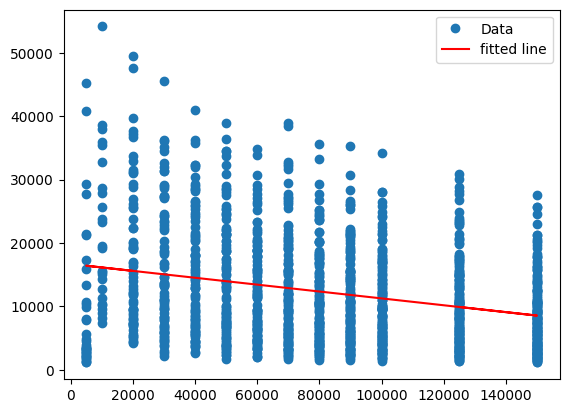

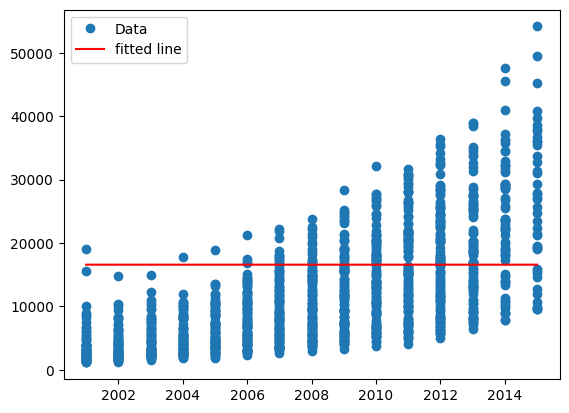

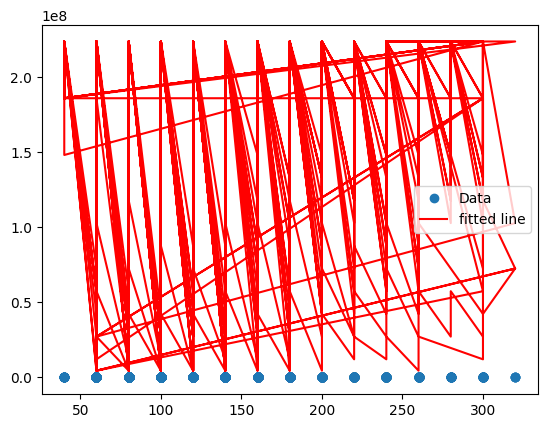

In [29]:
pred_y = [f(x, res.slope, res.intercept) for res in results for x in data[:-2]]
print(pred_y)
for i in range(3):
    plt.plot(data[i], y, "o", label="Data")
    plt.plot(data[i], pred_y[i], 'r', label='fitted line')
    plt.legend()
    plt.show()

In [18]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape
from sklearn.linear_model import LinearRegression

# your code.....

In [19]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !

# your code.....

In [20]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

# your code....


In [21]:
# linear regression with linregress (estimate price from power)

# your code.....

In [22]:
# linear regression with linregress (estimate price from km)

# your code...

In [23]:
# Have a look at the correlation coefficients to see which of the 3 features works better

# your code......

In [24]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)


# your code......
